In [1]:
from common import setup_imports
from constants import *
import os

setup_imports()

from pipeline import Pipeline

%load_ext autoreload
%autoreload 2

# 0002 Model Variation
Train and evaluate different models in various configuraion

### 004

In [2]:
from pipeline import Pipeline

pipeline = Pipeline(config_path=os.path.join(CONFIG_PATH, '004_32batch.yaml'))

/home/automatedtomato/github.com/automatedtomato/sar-yolo/.venv/lib/python3.12/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/home/automatedtomato/github.com/automatedtomato/sar-yolo/.venv/lib/python3.12/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)



Train Samples: 6129, Val Samples: 2043, Test Samples: 2043

Using device: cuda
Training model...
  Number of epochs: 50
  Device: cuda
  Patience: 10
  Save path: 004_best_model.pt



Failed to load image from data/new_dataset3/train/images/flood_image0435_4.png: Checksum mismatch while downloading:

  https://storage.googleapis.com/download/storage/v1/b/sar-dataset/o/data%2Fnew_dataset3%2Ftrain%2Fimages%2Fflood_image0435_4.png?alt=media

The X-Goog-Hash header indicated an CRC32C checksum of:

  tBi8TQ==

but the actual CRC32C checksum of the downloaded contents was:

  E+ASPA==



  Epoch: 1/50 - Batch: 0/767 - Loss: 65335.6562
      (Coord: 942.8899, Obj: 582.4521, NoObj: 63810.3125, Class: 0.0000)
  Epoch: 1/50 - Batch: 100/767 - Loss: 38004.2109
      (Coord: 409.5039, Obj: 998.3868, NoObj: 36596.3203, Class: 0.0000)
  Epoch: 1/50 - Batch: 200/767 - Loss: 28567.3750
      (Coord: 336.5270, Obj: 1333.2638, NoObj: 26897.5840, Class: 0.0000)
  Epoch: 1/50 - Batch: 300/767 - Loss: 25581.3750
      (Coord: 186.7769, Obj: 1253.3057, NoObj: 24141.2930, Class: 0.0000)
  Epoch: 1/50 - Batch: 400/767 - Loss: 24222.7441
      (Coord: 393.1861, Obj: 1367.9541, NoObj: 22461.6035, Class: 0.0000)
  Epoch: 1/50 - Batch: 500/767 - Loss: 21835.1074
      (Coord: 164.5527, Obj: 1214.7571, NoObj: 20455.7969, Class: 0.0000)
  Epoch: 1/50 - Batch: 600/767 - Loss: 20638.7734
      (Coord: 149.3154, Obj: 1572.5720, NoObj: 18916.8867, Class: 0.0000)
  Epoch: 1/50 - Batch: 700/767 - Loss: 19453.4727
      (Coord: 169.6170, Obj: 1782.8528, NoObj: 17501.0020, Class: 0.0000)

Epoch 1/50 

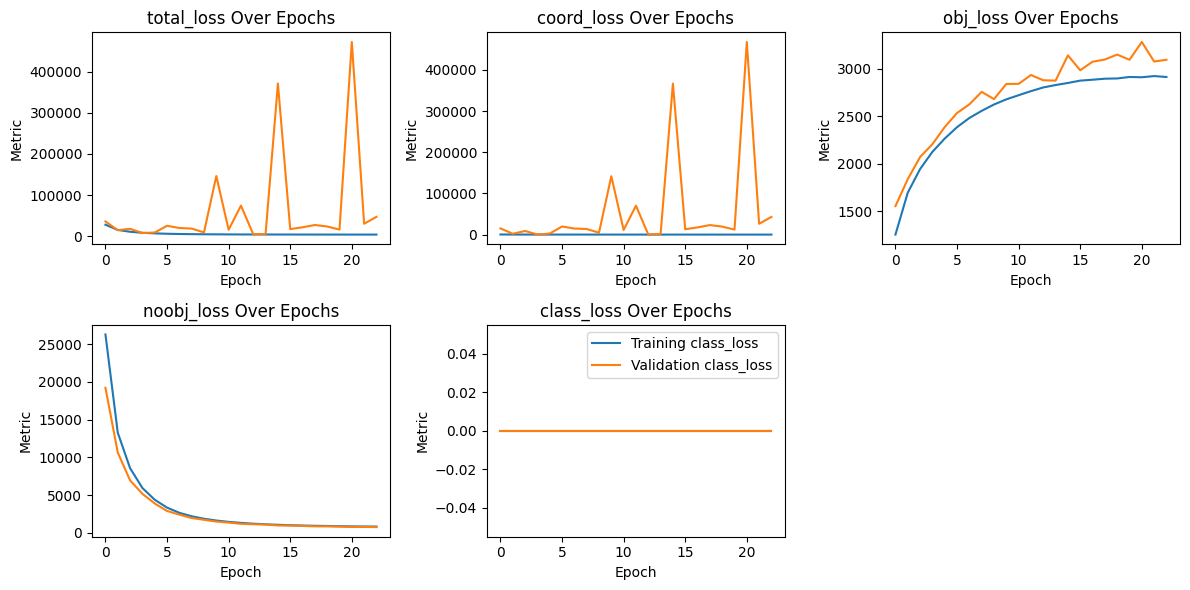

ValueError: Either config or config_path must be provided

In [3]:
metrics, model = pipeline.train_val_pipeline()

### 005

In [6]:
from torchvision import transforms
from data.dataset import create_dataloader
from models.yolov3 import YOLOv3
from models.train_val.train import train_model
from utils.data_stream import DataStream
from utils import load_config, validate_config
import os
from constants import *
import torch
from models.train_val.evaluation import learning_curve, YOLOv3Evaluator
import pandas as pd

config = load_config(os.path.join(CONFIG_PATH, '005.yaml'))

data_stream = DataStream(bucket_name=BUCKET_NAME)

transform = transforms.Compose([
    transforms.Resize((config['model']['input_size'], config['model']['input_size'])),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomHorizontalFlip(p=0.25), # diversify perspective
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05), # diversify lighting condition
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)), # simulate noise
    # transforms.RandomResizedCrop(size=416, scale=(0.8, 1.0)), # simulate altitude change
    transforms.RandomRotation(degrees=3) # diversify orientation
])
    
train_loader, val_loader, test_loader = create_dataloader(
    data_stream=data_stream,
    config=config,
    transform=transform,
    load_ratio=0.25
)
model = YOLOv3(config)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\n{__name__}:: Using device: {device}")

model = model.to(device)

model, train_history, val_history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    config=config,
    device=device
)


utils.load_config:: Loaded config from /home/automatedtomato/github.com/automatedtomato/sar-yolo/config/005.yaml


/home/automatedtomato/github.com/automatedtomato/sar-yolo/.venv/lib/python3.12/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/home/automatedtomato/github.com/automatedtomato/sar-yolo/.venv/lib/python3.12/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)



utils.data_stream:: Connected to GSC bucket: sar-dataset

data.dataset.data_loader:: Train Samples: 1532, Val Samples: 510, Test Samples: 510

__main__:: Using device: cuda

models.train_val.train:: 
Training model...
  Number of epochs: 1
  Device: cuda
  Patience: None
  Save path: 005_best_model.pt

  Epoch: 1/1 - Batch: 0/192 - Loss: 79931.6094
      (Coord: 942.2493, Obj: 490.0119, NoObj: 78499.3516, Class: 0.0000)
  Epoch: 1/1 - Batch: 100/192 - Loss: 10660.9521
      (Coord: 195.7453, Obj: 2567.7471, NoObj: 7897.4595, Class: 0.0000)

Epoch 1/1 finished.
	Learning Rate: 0.001000
	Train Loss: 19720.9190
	Val Loss: 41519.4215
	Loss Details:
		Coord Loss: T=428.4797, V=35611.7286
		Obj Loss: T=2160.4710, V=2824.9550
		Class Loss: T=0.0000, V=0.0000

------------------------------------------------------------

Training finished. Best val loss = inf
Saving model to 005_best_model.pt


In [7]:

train_history_df = pd.DataFrame(train_history)
train_history_df.to_csv('../metrics/train_history.csv', index=False)

val_history_df = pd.DataFrame(val_history)
val_history_df.to_csv('../metrics/val_history.csv', index=False)

train_history_df


,total_loss,coord_loss,obj_loss,noobj_loss,class_loss
0,19720.919039,428.479738,2160.471014,17131.968291,0.0


In [ ]:
evaluator = YOLOv3Evaluator(device=device, config=config)

metrics = evaluator.eval_model(
    model=model,
    test_loader=test_loader,
    config=config,
)


models.train_val.evaluation:: YOLOv3 evaluator initialized.

models.train_val.evaluation:: Evaluating model...


In [ ]:

metrics_df = pd.DataFrame(metrics, index=[0])
metrics_df.to_csv('../metrics/metrics.csv', index=False)

print(metrics_df)


In [16]:
images, targets = next(iter(train_loader)) # train_loader

In [28]:
targets[2].shape

torch.Size([8, 3, 60, 60, 5])